In [1]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_california_housing as fch 
import pandas as pd

In [3]:
housevalue = fch() 
X = pd.DataFrame(housevalue.data)
y = housevalue.target

In [4]:
X.shape

(20640, 8)

In [5]:
y.shape

(20640,)

In [6]:
X.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
housevalue.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [8]:
X.columns = housevalue.feature_names

In [9]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)
for i in [Xtrain, Xtest]:
    i.index = range(i.shape[0])
Xtrain.shape

(14448, 8)

In [10]:
reg = LR().fit(Xtrain, Ytrain)
yhat = reg.predict(Xtest)
yhat

array([1.51384887, 0.46566247, 2.2567733 , ..., 2.11885803, 1.76968187,
       0.73219077])

In [11]:
reg.coef_ #w

array([ 4.37358931e-01,  1.02112683e-02, -1.07807216e-01,  6.26433828e-01,
        5.21612535e-07, -3.34850965e-03, -4.13095938e-01, -4.26210954e-01])

In [12]:
[*zip(Xtrain.columns,reg.coef_)]

[('MedInc', 0.4373589305968407),
 ('HouseAge', 0.010211268294494018),
 ('AveRooms', -0.1078072161731762),
 ('AveBedrms', 0.626433827536378),
 ('Population', 5.216125353075968e-07),
 ('AveOccup', -0.0033485096463335778),
 ('Latitude', -0.4130959378947701),
 ('Longitude', -0.426210953620848)]

In [13]:
reg.intercept_

-36.256893229204046

In [14]:
from sklearn.metrics import mean_squared_error as MSE
MSE(yhat,Ytest)

0.530901263932457

In [15]:
y.max()

5.00001

In [16]:
y.min()

0.14999

In [18]:
import sklearn

In [21]:
cross_val_score(reg,X,y,cv=10,scoring="neg_mean_squared_error")

array([-0.48922052, -0.43335865, -0.8864377 , -0.39091641, -0.7479731 ,
       -0.52980278, -0.28798456, -0.77326441, -0.64305557, -0.3275106 ])

In [22]:
from sklearn.metrics import r2_score
r2_score(yhat,Ytest)

0.33806537615560206

In [24]:
r2 = reg.score(Xtest,Ytest)
r2

0.6043668160178818

In [25]:
r2_score(Ytest,yhat)

0.6043668160178818

In [26]:
r2_score(y_true = Ytest,y_pred = yhat)

0.6043668160178818

In [27]:
cross_val_score(reg,X,y,cv=10,scoring="r2").mean()

0.5110068610524569

In [28]:
from sklearn.metrics import explained_variance_score as EVS
EVS(Ytest,yhat)

0.6046102673854403

In [29]:
cross_val_score(reg,X,y,cv=10,scoring="explained_variance")

array([0.54187714, 0.6656149 , 0.47809615, 0.50688473, 0.58687308,
       0.54979333, 0.49559713, 0.4639423 , 0.49176267, 0.60454547])

In [30]:
import matplotlib.pyplot as plt
sorted(Ytest)

[0.14999,
 0.14999,
 0.225,
 0.325,
 0.35,
 0.375,
 0.388,
 0.392,
 0.394,
 0.396,
 0.4,
 0.404,
 0.409,
 0.41,
 0.43,
 0.435,
 0.437,
 0.439,
 0.44,
 0.44,
 0.444,
 0.446,
 0.45,
 0.45,
 0.45,
 0.45,
 0.455,
 0.455,
 0.455,
 0.456,
 0.462,
 0.463,
 0.471,
 0.475,
 0.478,
 0.478,
 0.481,
 0.481,
 0.483,
 0.483,
 0.485,
 0.485,
 0.488,
 0.489,
 0.49,
 0.492,
 0.494,
 0.494,
 0.494,
 0.495,
 0.496,
 0.5,
 0.5,
 0.504,
 0.505,
 0.506,
 0.506,
 0.508,
 0.508,
 0.51,
 0.516,
 0.519,
 0.52,
 0.521,
 0.523,
 0.523,
 0.525,
 0.525,
 0.525,
 0.525,
 0.525,
 0.527,
 0.527,
 0.528,
 0.529,
 0.53,
 0.531,
 0.532,
 0.534,
 0.535,
 0.535,
 0.535,
 0.538,
 0.538,
 0.539,
 0.539,
 0.539,
 0.541,
 0.541,
 0.542,
 0.542,
 0.542,
 0.543,
 0.543,
 0.544,
 0.544,
 0.546,
 0.547,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.551,
 0.553,
 0.553,
 0.553,
 0.554,
 0.554,
 0.554,
 0.555,
 0.556,
 0.556,
 0.557,
 0.558,
 0.558,
 0.559,
 0.559,
 0.559,
 0.559,
 0.56,
 0.56,
 0.562,
 0.566,
 0.567,
 

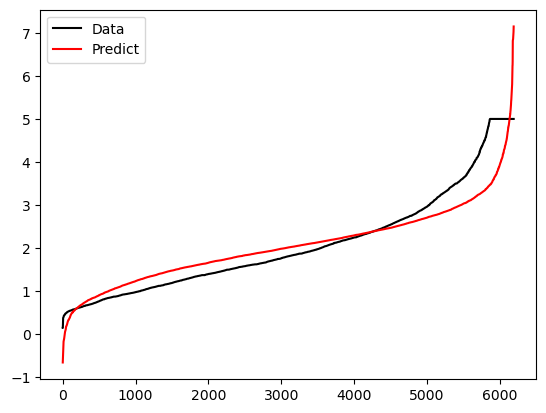

In [31]:
plt.plot(range(len(Ytest)),sorted(Ytest),c="black",label= "Data")
plt.plot(range(len(yhat)),sorted(yhat),c="red",label = "Predict")
plt.legend()
plt.show()

In [32]:
import numpy as np
rng = np.random.RandomState(42)
X = rng.randn(100, 80)
y = rng.randn(100)
cross_val_score(LR(), X, y, cv=5, scoring='r2') #R^2 can be negative when fit is shitty

array([-179.12952605,   -5.692624  ,  -15.61747513,  -78.68042858,
        -59.5311006 ])

In [39]:
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

In [40]:
diabetes = load_diabetes()
train = diabetes.data
target = diabetes.target
feature_names = diabetes.feature_names

In [41]:
X_train,X_test,y_train,y_test = train_test_split(train,target,test_size=0.2)

In [42]:
rideg = Ridge(alpha=1.0)
rideg.fit(X_train,y_train)

Ridge()

In [43]:
rideg.coef_

array([  21.2474743 ,  -67.73779263,  260.45465124,  200.18667429,
          6.10408226,  -23.15091223, -144.4317978 ,  115.84244748,
        234.75334968,  124.9994357 ])

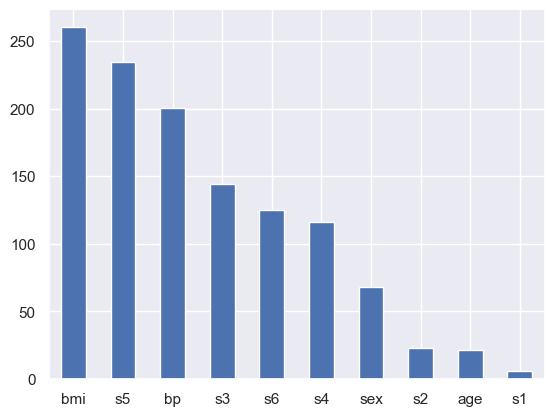

In [44]:
sns.set()
importances = Series(data=np.abs(rideg.coef_),index=feature_names).sort_values(ascending=False)
importances.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

In [45]:
importancesm_cols = ['sex','bmi','bp','s3','s4','s6','s5']
datasets = DataFrame(data=train,columns=feature_names)
X = datasets[importancesm_cols]
y = target

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
rideg = Ridge(alpha=1.0)
rideg.fit(X_train,y_train)

Ridge()

In [47]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,rideg.predict(X_test))

3136.387323702806

C:\Users\86151\miniconda3\envs\text-mine\lib\site-packages\sklearn\base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\86151\miniconda3\envs\text-mine\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


NameError: name 'parameters' is not defined

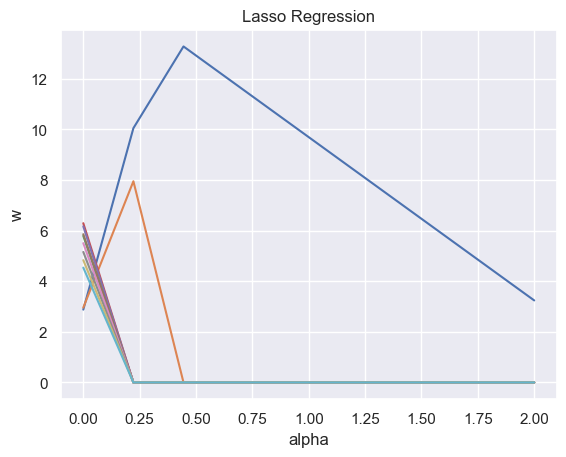

In [49]:
import numpy as np
from scipy.linalg import hilbert
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
%matplotlib inline

x = hilbert(10)
w = np.random.randint(2,10,10) 
y_temp = np.matrix(x) * np.matrix(w).T 
y = np.array(y_temp.T)[0] 
alphas = np.linspace(0,2,10)
lasso_coefs = []
for a in alphas:
    lasso = Lasso(alpha=a,fit_intercept=False)
    lasso.fit(x,y)
    lasso_coefs.append(lasso.coef_)
 
plt.plot(alphas,lasso_coefs) 
plt.xlabel('alpha')
plt.ylabel('w')
plt.title('Lasso Regression')
plt.scatter(np.linspace(0,0,10),parameters[0]) 

plt.show()
